# <font color="blue"> Administración Activa vs Administración Pasiva del Capita </font>

### Equipo D


Axel Munguía

Esteban Navarrete

Alejandro Preciado

José Antonio Quintero

**Situación**

Acabas de entrar a trabajar a una operadora de fondos de inversión como analista financiero dentro de la mesa de análisis del mercado de renta variable. En la junta trimestral se plantea la posibilidad de crear un fondo propio con exposición al mercado de valores de USA tratando de replicar a los ETFs conocidos como ishares que la empresa BlackRock ofrece.

La idea es replicar un ETF con posiciones en directo. Te han asignado la tarea de hacer un ejercicio simple de replicar la construcción de un portafolio de inversión y un criterio de rebalanceo lo más parecido a un ETF de ishares que tu selecciones. Esto con la finalidad de comparar los resultados de haber rebalanceado periódicamente el portafolio, ó, no haberlo hecho y continuar todo un año con las mismas posiciones.

### ETF a utilizar: iShares Core S&P 500 ETF

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web 
style.use("ggplot")

# Análisis de S&P 500 ETF (Febrero 2018)

In [3]:
# Cabecera del ETF
data = pd.read_csv("../Datos/Febrero_2018.csv",skiprows=10)
data_ = data.iloc[:-2,:]
data_.head()

,Ticker,Name,Asset Class,Weight (%),Price,Shares,Market Value,Notional Value,Sector,SEDOL,ISIN,Exchange
0,AAPL,APPLE INC,Equity,3.93,178.12,"34,128,429.00","6,078,955,773.48","6,078,955,773.48",Information Technology,2046251,US0378331005,NASDAQ
1,MSFT,MICROSOFT CORP,Equity,3.11,93.77,"51,279,537.00","4,808,482,184.49","4,808,482,184.49",Information Technology,2588173,US5949181045,NASDAQ
2,AMZN,AMAZON COM INC,Equity,2.60,"1,512.45","2,658,635.00","4,021,052,505.75","4,021,052,505.75",Consumer Discretionary,2000019,US0231351067,NASDAQ
3,FB,FACEBOOK CLASS A INC,Equity,1.83,178.32,"15,851,657.00","2,826,667,476.24","2,826,667,476.24",Information Technology,B7TL820,US30303M1027,NASDAQ
4,JPM,JPMORGAN CHASE & CO,Equity,1.72,115.5,"23,063,215.00","2,663,801,332.50","2,663,801,332.50",Financials,2190385,US46625H1005,New York Stock Exchange Inc.


In [4]:
# Cola del ETF
data_.tail()

,Ticker,Name,Asset Class,Weight (%),Price,Shares,Market Value,Notional Value,Sector,SEDOL,ISIN,Exchange
503,RRC,RANGE RESOURCES CORP,Equity,0.01,13.29,"1,502,148.00","19,963,546.92","19,963,546.92",Energy,2523334,US75281A1097,New York Stock Exchange Inc.
504,UA,UNDER ARMOUR INC CLASS C,Equity,0.01,15.05,"1,179,518.00","17,751,745.90","17,751,745.90",Consumer Discretionary,BDF9YM2,US9043112062,New York Stock Exchange Inc.
505,PDCO,PATTERSON COMPANIES INC,Equity,0.01,31.58,"558,448.00","17,635,787.84","17,635,787.84",Health Care,2672689,US7033951036,NASDAQ
506,CHK,CHESAPEAKE ENERGY CORP,Equity,0.01,2.82,"6,038,886.00","17,029,658.52","17,029,658.52",Energy,2182779,US1651671075,New York Stock Exchange Inc.
507,NWS,NEWS CORP CLASS B,Equity,0.01,16.4,"791,807.00","12,985,634.80","12,985,634.80",Consumer Discretionary,BBGVT51,US65249B2088,NASDAQ


In [5]:
data.tail() # Si no se remueven los últimos dos valores

,Ticker,Name,Asset Class,Weight (%),Price,Shares,Market Value,Notional Value,Sector,SEDOL,ISIN,Exchange
505,PDCO,PATTERSON COMPANIES INC,Equity,0.01,31.58,"558,448.00","17,635,787.84","17,635,787.84",Health Care,2672689,US7033951036,NASDAQ
506,CHK,CHESAPEAKE ENERGY CORP,Equity,0.01,2.82,"6,038,886.00","17,029,658.52","17,029,658.52",Energy,2182779,US1651671075,New York Stock Exchange Inc.
507,NWS,NEWS CORP CLASS B,Equity,0.01,16.4,"791,807.00","12,985,634.80","12,985,634.80",Consumer Discretionary,BBGVT51,US65249B2088,NASDAQ
508,ESH8,S&P500 EMINI MAR 18,Futures,0.00,"2,714.40","5,669.00",0,"769,396,680.00",Cash and/or Derivatives,-,-,Index And Options Market
509,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_.shape

(508, 12)

In [7]:
data_.dtypes

Ticker             object
Name               object
Asset Class        object
Weight (%)        float64
Price              object
Shares             object
Market Value       object
Notional Value     object
Sector             object
SEDOL              object
ISIN               object
Exchange           object
dtype: object

**Conocer la frecuencia de cada Sector presente en el ETF**

In [8]:
# Nos autentificamos
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
tls.set_credentials_file(username='AxelMunguia',api_key='gBH6UcAyUKdKaDosQlYk')

In [9]:
Sector = data_["Sector"].value_counts()
Sector

Consumer Discretionary     84
Industrials                70
Information Technology     68
Financials                 67
Health Care                61
Consumer Staples           34
Real Estate                33
Energy                     32
Utilities                  28
Materials                  25
Telecommunications          3
Cash and/or Derivatives     3
Name: Sector, dtype: int64

In [10]:
trace=go.Bar(x=Sector,y=Sector.index.values, name='Frecuencia de cada Sector en ETF',text=Sector.index.values,orientation="h")
layout= dict(title='Frecuencia de cada Sector en ETF', xaxis=dict(zeroline=True),
            yaxis=dict(zeroline=False))


fig=dict(data = [trace],layout=layout)
py.iplot(fig)

C:\Users\sacel\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



**Tipos de Activos que componen el  ETF**

In [11]:
Class = data_["Asset Class"].value_counts()
Class

Equity                         505
Cash Collateral and Margins      1
Money Market                     1
Cash                             1
Name: Asset Class, dtype: int64

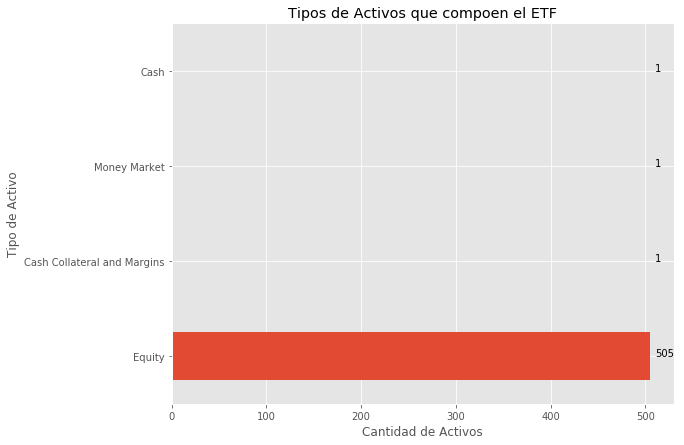

In [12]:
Class.plot(kind="barh",figsize=(9,7))
for k in range(4):
    plt.text(510,k,Class[k])
plt.title("Tipos de Activos que compoen el ETF")
plt.xlabel("Cantidad de Activos")
plt.ylabel("Tipo de Activo")
plt.show()

**Conocer la ponderación de los activos (Frecuencia)**

In [13]:
Pesos = data_["Weight (%)"].values.tolist()
Pesos.sort()
Pesos[:10] # De manera Ascendente

[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02]

In [14]:
trace=go.Histogram(x=Pesos, name="Ponderación de Activos en ETF")
layout= dict(title="Ponderación de Activos en ETF", xaxis=dict(zeroline=True),
            yaxis=dict(zeroline=False))
fig=dict(data = [trace],layout=layout)
py.iplot(fig)

**Información general por Sector**

In [23]:
Prom_Sector = pd.DataFrame(data_.groupby(["Sector"]).mean())
Sec = pd.DataFrame(data_.Sector.value_counts())
Merge = pd.merge(left=Prom_Sector,right=Sec,left_on=Prom_Sector.index.values,right_on=Sec.index.values)
Merge

,key_0,Weight (%),Sector
0,Cash and/or Derivatives,0.166667,3
1,Consumer Discretionary,0.150714,84
2,Consumer Staples,0.220588,34
3,Energy,0.170625,32
4,Financials,0.222239,67
5,Health Care,0.224918,61
6,Industrials,0.145714,70
7,Information Technology,0.368235,68
8,Materials,0.115600,25
9,Real Estate,0.078485,33


In [24]:
trace=go.Bar(x=Prom_Sector.values,y=Prom_Sector.index.values, name='Ponderación Promedio por Sector',text=Prom_Sector.index.values,orientation="h")
layout= dict(title='Ponderación Promedio por Sector', xaxis=dict(zeroline=True),
            yaxis=dict(zeroline=False))


fig=dict(data = [trace],layout=layout)
py.iplot(fig)

## Análsis Numérico

In [3]:
Nombres_archivos = ["Febrero_2017","Marzo_2017","Abril_2017","Mayo_2017","Junio_2017","Julio_2017","Agosto_2017",
                   "Septiembre_2017","Octubre_2017","Noviembre_2017","Diciembre_2017","Enero_2018","Febrero_2018"]

In [18]:
data_1 = pd.read_csv("../Datos/"+Nombres_archivos[0]+".csv",skiprows=10)
data_1.head()

,Ticker,Name,Asset Class,Weight (%),Price,Shares,Market Value,Notional Value,Sector,SEDOL,ISIN,Exchange
0,AAPL,APPLE INC,Equity,3.58,136.99,"25,594,504.00","3,506,191,102.96","3,506,191,102.96",Information Technology,2046251,US0378331005,NASDAQ
1,MSFT,MICROSOFT CORP,Equity,2.44,63.98,"37,320,810.00","2,387,785,423.80","2,387,785,423.80",Information Technology,2588173,US5949181045,NASDAQ
2,XOM,EXXON MOBIL CORP,Equity,1.65,81.32,"19,903,660.00","1,618,565,631.20","1,618,565,631.20",Energy,2326618,US30231G1022,New York Stock Exchange Inc.
3,AMZN,AMAZON COM INC,Equity,1.63,845.04,"1,893,021.00","1,599,678,465.84","1,599,678,465.84",Consumer Discretionary,2000019,US0231351067,NASDAQ
4,JNJ,JOHNSON & JOHNSON,Equity,1.63,122.21,"13,058,249.00","1,595,848,610.29","1,595,848,610.29",Health Care,2475833,US4781601046,New York Stock Exchange Inc.


**Definir Función que descargará los precios**

In [396]:
def get_closes(tickers, start_date=None, end_date=None, freq=None):
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    for ticker in tickers:
        try:
            df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
            closes[ticker]=df['Adj Close']
        except:
            continue
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [21]:
# Descargamos precios del S&P500(índice) para conocer su comportamiento.
df = web.YahooDailyReader(symbols=["^GSPC"],start="28/02/2017",end="28/02/2018", interval="d").read()
df.head()

Attributes,High,Low,Open,Close,Volume,Adj Close
Symbols,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
2017-02-28,2367.790039,2358.959961,2366.080078,2363.639893,4210140000,2363.639893
2017-03-01,2400.979980,2380.129883,2380.129883,2395.959961,4345180000,2395.959961
2017-03-02,2394.750000,2380.169922,2394.750000,2381.919922,3821320000,2381.919922
2017-03-03,2383.889893,2375.389893,2380.919922,2383.120117,3555260000,2383.120117
2017-03-06,2378.800049,2367.979980,2375.229980,2375.310059,3232700000,2375.310059


In [22]:
trace = go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])
layout= dict(title='Precio S&P500 de 28/02/2017 a 28/02/2018', xaxis=dict(zeroline=True),
            yaxis=dict(zeroline=True))
data = dict(data = [trace], layout = layout)
py.iplot(data, filename='simple_candlestick')

C:\Users\sacel\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### Obtener Total Net Assets and Shares Outstanding en un solo DataFrame

In [ ]:
Net_ASO = pd.read_csv("../Datos/"+Nombres_archivos[0]+".csv",error_bad_lines=False,warn_bad_lines=False)
Net_ASO = pd.DataFrame(Net_ASO.iloc[2:4,:])
column = Net_ASO.columns.values # Hay problemas con algunos csv's, por lo tanto, tomamos el valor de la colunmna correcta
index_val = Net_ASO.index.values # Lo mismo que arriba, pero tomamos valores de índices
Net_ASO

In [ ]:
# Construir función para tomar el de cada mes
for k in Nombres_archivos[1:]:
    data = pd.read_csv("../Datos/"+k+".csv",error_bad_lines=False,warn_bad_lines=False)
    data = data.iloc[2:4,:] 
    if data.shape[1]==1:
        Net_ASO = pd.concat([Net_ASO,data],axis=1)
    else:
        valores = data.iloc[:,1].values.tolist()
        data = pd.DataFrame(valores,columns=column, index=index_val)
        Net_ASO = pd.concat([Net_ASO,data],axis=1)